# Aggregate Dataset for PSP



In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
dir_root = '../../data/modified_psp_data/'
dir_out = '../../data/modified_psp_data/'

path_train = os.path.join(dir_root, "df_agg_20230426_001200_01.csv")


In [3]:
def get_null_cols(df_data, num_null=0):
    display(df_data[df_data.isnull().any(axis=1)])
    
    dict_col_nulls = dict(df_data.isnull().sum(axis = 0))
    display(dict_col_nulls)
    
    list_null_cols = []
    for col, count_nulls in dict_col_nulls.items():
        if count_nulls > num_null:
            list_null_cols.append(col)
    
    display(list_null_cols)
    return list_null_cols
        

In [4]:
def read_data(csv_path):
    df_agg = pd.read_csv(csv_path)
    
    list_null_cols = get_null_cols(df_agg)
    
    list_all_cols = list(df_agg.columns)
    list_selected_cols = [x for x in list_all_cols if x not in list_null_cols]
    
    print(f"Removed NULL columns: {len(list_null_cols)}")
    # Alternatively, we could assign a specific value for each column having NULL. 
    # Needs more domain knowledge.
    
    df_agg = df_agg[list_selected_cols]
    
    return df_agg, list_null_cols
    

In [5]:
df_agg, list_null_cols = read_data(path_train)

df_agg.head()

,ith_sess,session_id,navigate_click:0-4,cutscene_click:0-4,person_click:0-4,object_click:0-4,notification_click:0-4,observation_click:0-4,object_hover:0-4,map_hover:0-4,...,q13,q14,q15,q16,q17,q18,num_correct,notebook_click:0-4,notebook_click:5-12,notebook_click:13-22
0,0,20090312431273200,81,28,22,11,8,4.0,4.0,4.0,...,0,1,1,0,1,1,16,NaN,NaN,NaN
3,3,20090314363702160,66,32,18,11,6,NaN,8.0,2.0,...,0,1,0,0,1,1,15,NaN,NaN,6.0
4,4,20090314441803444,37,29,18,6,5,NaN,5.0,4.0,...,0,1,1,1,1,1,14,NaN,NaN,NaN
5,5,20090315081004164,78,36,18,35,9,2.0,6.0,1.0,...,1,1,1,1,1,1,14,NaN,2.0,NaN
10,10,20090317111400710,124,29,22,30,11,7.0,9.0,3.0,...,1,1,1,0,1,1,12,NaN,16.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11768,11768,22100212552203824,147,39,34,37,8,NaN,4.0,4.0,...,0,1,0,1,0,0,7,NaN,22.0,60.0
11770,11770,22100213133089136,62,32,18,10,6,NaN,3.0,2.0,...,0,1,1,0,1,1,15,NaN,3.0,2.0
11771,11771,22100215032067016,74,45,21,15,5,NaN,2.0,2.0,...,0,1,1,1,1,1,14,NaN,2.0,NaN
11772,11772,22100215190998610,96,28,22,21,9,NaN,2.0,6.0,...,0,0,0,0,0,0,3,NaN,NaN,53.0


{'ith_sess': 0,
 'session_id': 0,
 'navigate_click:0-4': 0,
 'cutscene_click:0-4': 0,
 'person_click:0-4': 0,
 'object_click:0-4': 0,
 'notification_click:0-4': 0,
 'observation_click:0-4': 3843,
 'object_hover:0-4': 934,
 'map_hover:0-4': 2062,
 'map_click:0-4': 0,
 'checkpoint:0-4': 1,
 'person_click:5-12': 0,
 'navigate_click:5-12': 0,
 'object_click:5-12': 0,
 'object_hover:5-12': 934,
 'cutscene_click:5-12': 0,
 'map_hover:5-12': 934,
 'notification_click:5-12': 0,
 'map_click:5-12': 0,
 'observation_click:5-12': 0,
 'checkpoint:5-12': 0,
 'navigate_click:13-22': 0,
 'person_click:13-22': 0,
 'cutscene_click:13-22': 0,
 'object_click:13-22': 0,
 'map_hover:13-22': 934,
 'object_hover:13-22': 934,
 'notification_click:13-22': 0,
 'map_click:13-22': 0,
 'observation_click:13-22': 0,
 'checkpoint:13-22': 0,
 'elapsed_time:0-4': 1,
 'event_index:0-4': 1,
 'elapsed_time:5-12': 0,
 'event_index:5-12': 0,
 'elapsed_time:13-22': 0,
 'event_index:13-22': 0,
 'q1': 0,
 'q2': 0,
 'q3': 0,
 '

['observation_click:0-4',
 'object_hover:0-4',
 'map_hover:0-4',
 'checkpoint:0-4',
 'object_hover:5-12',
 'map_hover:5-12',
 'map_hover:13-22',
 'object_hover:13-22',
 'elapsed_time:0-4',
 'event_index:0-4',
 'notebook_click:0-4',
 'notebook_click:5-12',
 'notebook_click:13-22']

Removed NULL columns: 13


,ith_sess,session_id,navigate_click:0-4,cutscene_click:0-4,person_click:0-4,object_click:0-4,notification_click:0-4,map_click:0-4,person_click:5-12,navigate_click:5-12,...,q10,q11,q12,q13,q14,q15,q16,q17,q18,num_correct
0,0,20090312431273200,81,28,22,11,8,2,104,103,...,1,1,1,0,1,1,0,1,1,16
1,1,20090312433251036,49,36,18,15,5,3,97,115,...,0,0,1,0,1,0,1,0,1,10
2,2,20090314121766812,64,26,19,19,8,2,98,131,...,1,1,1,0,1,1,1,0,1,12
3,3,20090314363702160,66,32,18,11,6,2,114,99,...,1,1,1,0,1,0,0,1,1,15
4,4,20090314441803444,37,29,18,6,5,2,93,76,...,1,0,1,0,1,1,1,1,1,14


In [6]:
list_id = [
    'ith_sess',
    'session_id'
]

list_agg = [
    'navigate_click:0-4',
    'cutscene_click:0-4',
    'person_click:0-4',
    'object_click:0-4',
    'notification_click:0-4',
    'observation_click:0-4',
    'object_hover:0-4',
    'map_hover:0-4',
    'map_click:0-4',
    'checkpoint:0-4',
    'person_click:5-12',
    'navigate_click:5-12',
    'object_click:5-12',
    'object_hover:5-12',
    'cutscene_click:5-12',
    'map_hover:5-12',
    'notification_click:5-12',
    'map_click:5-12',
    'observation_click:5-12',
    'checkpoint:5-12',
    'navigate_click:13-22',
    'person_click:13-22',
    'cutscene_click:13-22',
    'object_click:13-22',
    'map_hover:13-22',
    'object_hover:13-22',
    'notification_click:13-22',
    'map_click:13-22',
    'observation_click:13-22',
    'checkpoint:13-22',
    'notebook_click:0-4',
    'notebook_click:5-12',
    'notebook_click:13-22'
]
list_agg.sort()

list_checkpoint_agg = [
    'elapsed_time:0-4',
    'event_index:0-4',
    'elapsed_time:5-12',
    'event_index:5-12',
    'elapsed_time:13-22',
    'event_index:13-22'
]
list_checkpoint_agg.sort()

list_q = [f"q{x}" for x in range(1, 19)]

list_num_correct = ['num_correct']


list_agg = [x for x in list_agg if x not in list_null_cols]
list_checkpoint_agg = [x for x in list_checkpoint_agg if x not in list_null_cols]

list_cols = list_id + list_agg + list_checkpoint_agg + list_q + list_num_correct


In [7]:
len(list_cols)

47

In [8]:
df_agg = df_agg[list_cols]

display(df_agg.shape)

df_agg.head()


(11779, 47)

,ith_sess,session_id,checkpoint:13-22,checkpoint:5-12,cutscene_click:0-4,cutscene_click:13-22,cutscene_click:5-12,map_click:0-4,map_click:13-22,map_click:5-12,...,q10,q11,q12,q13,q14,q15,q16,q17,q18,num_correct
0,0,20090312431273200,1,1,28,60,12,2,6,8,...,1,1,1,0,1,1,0,1,1,16
1,1,20090312433251036,1,1,36,65,11,3,45,16,...,0,0,1,0,1,0,1,0,1,10
2,2,20090314121766812,1,1,26,58,14,2,7,9,...,1,1,1,0,1,1,1,0,1,12
3,3,20090314363702160,1,1,32,76,11,2,12,7,...,1,1,1,0,1,0,0,1,1,15
4,4,20090314441803444,1,1,29,57,11,2,6,6,...,1,0,1,0,1,1,1,1,1,14


# Split into train and test data

In [9]:
import random

def create_train_test_splits(dir_out, df_data, test_split=0.2):
    list_unique_sessions = list(df_data['session_id'].unique())
    print(f"list_unique_sessions: {len(list_unique_sessions)}")
    
    len_data = len(list_unique_sessions)
    len_test = int(test_split * len_data)
    
    list_random_sessions = random.sample(list_unique_sessions, len_data)
    
    list_train_sessions = list_random_sessions[:-len_test]
    list_test_sessions = list_random_sessions[-len_test:]
    
    df_train = pd.DataFrame()
    df_train["session_id"] = list_train_sessions
    df_train["split_type"] = "train"
    
    df_test = pd.DataFrame()
    df_test["session_id"] = list_test_sessions
    df_test["split_type"] = "test"
    
    print(f"Train split: {df_train.shape}, Test split: {df_test.shape}")
    
    df_train_test_splits = pd.concat([df_train, df_test], axis=0)
    print(f"Combined len: {df_train_test_splits.shape}")
    
    split_out_path = os.path.join(dir_out, "df_train_test_splits.csv")
    
    df_train_test_splits.to_csv(split_out_path, index=False)
    print(f"Saved df_train_test_splits at: {split_out_path}")
    
    return df_train_test_splits
    

    
def get_train_test_splits_splits(df_agg):
    print(f"Combined len: {df_agg.shape}")
    
    split_out_path = os.path.join(dir_out, "df_train_test_splits.csv")
    df_train_test_splits = pd.read_csv(split_out_path)
    
    list_train_sessions = list(df_train_test_splits[df_train_test_splits["split_type"] == "train"]['session_id'])
    list_test_sessions = list(df_train_test_splits[df_train_test_splits["split_type"] == "test"]['session_id'])
 
    df_agg_train = df_agg[df_agg['session_id'].isin(list_train_sessions)].copy()
    df_agg_test = df_agg[df_agg['session_id'].isin(list_test_sessions)].copy()
    
    print(f"Train split: {df_agg_train.shape}, Test split: {df_agg_test.shape}")
    
    
    return df_agg_train, df_agg_test
    


In [10]:
# df_1 = create_train_test_splits(dir_out, df_agg)

df_agg_train, df_agg_test = get_train_test_splits_splits(df_agg)


Combined len: (11779, 47)
Train split: (9424, 47), Test split: (2355, 47)


# Statistical Analysis

Reference:
1. https://www.statology.org/statsmodels-linear-regression-p-value/
2. https://www.statsmodels.org/stable/api.html

In [11]:
# !pip install statsmodels

In [12]:
import statsmodels.api as sm


In [13]:
# df_temp = df_agg_train.head(100)
df_temp = df_agg_train.copy()

list_cols_x = list_agg + list_checkpoint_agg
list_cols_y = list_q
col_y = list_cols_y[-1]


In [14]:

# define predictor and response variables
y = df_temp[col_y]
x = df_temp[list_cols_x]

# add constant to predictor variables
x = sm.add_constant(x)

# fit linear regression model
model = sm.OLS(y, x).fit()

# view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    q18   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     16.54
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           6.51e-73
Time:                        21:39:56   Log-Likelihood:                 1323.3
No. Observations:                9424   AIC:                            -2593.
Df Residuals:                    9397   BIC:                            -2399.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [15]:

# define predictor and response variables
y = df_temp[col_y]
x = df_temp[list_cols_x]

# add constant to predictor variables
x = sm.add_constant(x)

# fit linear regression model
model = sm.GLM(y, x).fit()

# view model summary
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    q18   No. Observations:                 9424
Model:                            GLM   Df Residuals:                     9397
Model Family:                Gaussian   Df Model:                           26
Link Function:               identity   Scale:                        0.044341
Method:                          IRLS   Log-Likelihood:                 1323.3
Date:                Wed, 26 Apr 2023   Deviance:                       416.68
Time:                        21:40:03   Pearson chi2:                     417.
No. Iterations:                     3   Pseudo R-squ. (CS):            0.04460
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [16]:
def get_list_significant_features(model):
    dict_pvals = dict(model.pvalues)
    display(dict_pvals)

    # Set significance level to reject NULL Hypothesis
    significance_level = 0.05
    significant_vars = {var: pval for var, pval in dict_pvals.items() if pval <= significance_level}

    display(significant_vars)

    list_significant_features = [var for var, pval in dict_pvals.items() if pval <= significance_level and var != 'const']
    
    return list_significant_features


In [17]:
# Use only pvalue based selected features
list_significant_features = get_list_significant_features(model)

# define predictor and response variables
y = df_temp[col_y]
x = df_temp[list_significant_features]

# add constant to predictor variables
x = sm.add_constant(x)

# fit linear regression model
model_sig = sm.GLM(y, x).fit()

# view model summary
print(model_sig.summary())

{'const': 1.1266942506775865e-76,
 'checkpoint:13-22': 0.7084959626265068,
 'checkpoint:5-12': 0.060494033193490095,
 'cutscene_click:0-4': 0.547209405274715,
 'cutscene_click:13-22': 2.2417387896445434e-06,
 'cutscene_click:5-12': 0.49741088111487397,
 'map_click:0-4': 0.0006855310244132526,
 'map_click:13-22': 0.016092131575549687,
 'map_click:5-12': 0.4701275785269602,
 'navigate_click:0-4': 0.09755952853425721,
 'navigate_click:13-22': 0.016742016237844767,
 'navigate_click:5-12': 0.5166688636243915,
 'notification_click:0-4': 0.5614365801799777,
 'notification_click:13-22': 0.008584825495620245,
 'notification_click:5-12': 0.004494408286645382,
 'object_click:0-4': 0.7760694765707647,
 'object_click:13-22': 0.009727285228161473,
 'object_click:5-12': 0.7161153635672732,
 'observation_click:13-22': 0.025960619130838407,
 'observation_click:5-12': 0.7119427412592961,
 'person_click:0-4': 0.0416892446509611,
 'person_click:13-22': 0.0004349545067699322,
 'person_click:5-12': 0.007563

{'const': 1.1266942506775865e-76,
 'cutscene_click:13-22': 2.2417387896445434e-06,
 'map_click:0-4': 0.0006855310244132526,
 'map_click:13-22': 0.016092131575549687,
 'navigate_click:13-22': 0.016742016237844767,
 'notification_click:13-22': 0.008584825495620245,
 'notification_click:5-12': 0.004494408286645382,
 'object_click:13-22': 0.009727285228161473,
 'observation_click:13-22': 0.025960619130838407,
 'person_click:0-4': 0.0416892446509611,
 'person_click:13-22': 0.0004349545067699322,
 'person_click:5-12': 0.007563653078286495,
 'event_index:13-22': 0.006990344287760618}

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    q18   No. Observations:                 9424
Model:                            GLM   Df Residuals:                     9411
Model Family:                Gaussian   Df Model:                           12
Link Function:               identity   Scale:                        0.044382
Method:                          IRLS   Log-Likelihood:                 1311.9
Date:                Wed, 26 Apr 2023   Deviance:                       417.68
Time:                        21:40:54   Pearson chi2:                     418.
No. Iterations:                     3   Pseudo R-squ. (CS):            0.04226
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [18]:
x

,const,cutscene_click:13-22,map_click:0-4,map_click:13-22,navigate_click:13-22,notification_click:13-22,notification_click:5-12,object_click:13-22,observation_click:13-22,person_click:0-4,person_click:13-22,person_click:5-12,event_index:13-22
0,1.0,60,2,6,170,10,9,20,3,22,123,104,931
1,1.0,65,3,45,637,14,9,83,5,18,145,97,1875
2,1.0,58,2,7,190,17,9,21,6,19,104,98,1082
4,1.0,57,2,6,158,8,9,41,4,18,102,93,832
5,1.0,65,2,22,514,16,9,53,7,18,110,103,1584
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11772,1.0,58,3,57,882,13,12,41,10,22,141,111,2341
11773,1.0,58,2,6,239,14,9,31,5,19,114,101,1114
11774,1.0,59,2,7,169,8,12,22,4,21,109,99,913
11775,1.0,70,2,13,148,8,9,13,5,21,135,130,1021


In [24]:
list_significant_features

['cutscene_click:13-22',
 'map_click:0-4',
 'map_click:13-22',
 'navigate_click:13-22',
 'notification_click:13-22',
 'notification_click:5-12',
 'object_click:13-22',
 'observation_click:13-22',
 'person_click:0-4',
 'person_click:13-22',
 'person_click:5-12',
 'event_index:13-22']

In [25]:
df_test_x = df_agg_test[list_significant_features].copy()
df_test_x['const'] = 1.0

df_test_y = df_agg_test[col_y]

preds = model_sig.predict(df_test_x)

preds

3        77.825013
7        64.352887
21       62.403184
25       59.407428
35       79.030832
           ...    
11765    61.618895
11766    73.688490
11768    61.217926
11776    76.734983
11778    77.424321
Length: 2355, dtype: float64

- The Linear model do not work as expected in this case because this is a highly non-linear problem.

# Multilabel classification problem

References:
1. https://machinelearningmastery.com/multi-label-classification-with-deep-learning/

In summary, to configure a neural network model for multi-label classification, the specifics are:

- Number of nodes in the output layer matches the number of labels.
- Sigmoid activation for each node in the output layer.
- Binary cross-entropy loss function.

In [26]:

# mlp for multi-label classification
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Dense


In [27]:

# get the dataset
# def get_dataset():
#     X, y = make_multilabel_classification(n_samples=1000, n_features=10, n_classes=3, n_labels=2, random_state=1)
#     return X, y

def get_dataset(df_data, list_features, list_target):
    npa_x = df_data[list_features].to_numpy()
    npa_y = df_data[list_target].to_numpy()
    return npa_x, npa_y

In [28]:
list_features = list_agg + list_checkpoint_agg
list_target = list_q

npa_x, npa_y = get_dataset(df_agg_train, 
                           list_features,
                           list_target)


In [29]:
n_inputs = npa_x.shape[1]
n_outputs = npa_y.shape[1]

print(f"n_inputs: {n_inputs}, n_outputs: {n_outputs}")

n_inputs: 26, n_outputs: 18


In [30]:
npa_x.shape

(9424, 26)

In [31]:
npa_test_x, npa_test_y = get_dataset(df_agg_test, 
                           list_features,
                           list_target)

In [32]:
npa_test_y.shape

(2355, 18)

In [33]:

 
# Multilayer Perceptron
from tensorflow.keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
    
# get the model
def get_model(num_inputs, num_outputs, num_hidden_units=32):
    layer_input = Input(shape=(num_inputs,))
    layer_hidden_01 = Dense(num_hidden_units, 
                            kernel_initializer='he_uniform', 
                            activation='relu'
                           )(layer_input)
    
    layer_hidden_02 = Dense(num_hidden_units//2, 
                            kernel_initializer='he_uniform', 
                            activation='relu'
                           )(layer_hidden_01)
    
    layer_output = Dense(num_outputs, 
                         activation='sigmoid'
                        )(layer_hidden_02)
    
    model = Model(inputs=layer_input, 
                  outputs=layer_output)
    
    
    model.compile(loss='binary_crossentropy', 
                  optimizer='adam')
    
#     model = Sequential()
    
#     model.add(Dense(num_hidden_units, 
#                     input_dim=n_inputs, 
#                     kernel_initializer='he_uniform', 
#                     activation='relu')
#              )
    
#     model.add(Dense(num_hidden_units, 
#                     input_dim=n_inputs, 
#                     kernel_initializer='he_uniform', 
#                     activation='relu')
#              )
    
#     model.add(Dense(n_outputs, 
#                     activation='sigmoid')
#              )
    
#     model.compile(loss='binary_crossentropy', 
#                   optimizer='adam')
    
    return model

In [52]:
def calc_accuracies(test_y, pred_y, num_questions=18):
    # Overall accuracy
    overall_acc = round(accuracy_score(test_y, pred_y)*100, 3)
    print(f"Overall Accuracy: {overall_acc}")
    
    num_records = test_y[:, 0].shape[0]
    list_records = []
    total_acc = 0.0
    for ith in range(num_questions):
        dict_record = {"question": ith+1}
        tmp_test_y = test_y[:, ith]
        tmp_pred_y = pred_y[:, ith]
        tmp_acc = round(accuracy_score(tmp_test_y, tmp_pred_y)*100, 3)
        
        dict_record[f"correct_test_y"] = sum(tmp_test_y)
        dict_record[f"incorrect_test_y"] = num_records - sum(tmp_test_y)
        
        dict_record[f"correct_pred_y"] = sum(tmp_pred_y)
        dict_record[f"incorrect_pred_y"] = num_records - sum(tmp_pred_y)
        
        dict_record[f"acc_test_y"] = tmp_acc
        
        total_acc += tmp_acc
        
        list_records.append(dict_record)
    
    df_acc = pd.DataFrame.from_records(list_records)
    display(df_acc)
    
    avg_acc = round(total_acc / num_questions, 3)
    print(f"Average Accuracy: {avg_acc}")
    
    return df_acc

In [48]:
npa_test_y

array([[1, 1, 1, ..., 0, 1, 1],
       [1, 1, 1, ..., 0, 1, 1],
       [0, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 0, 1, 1],
       [0, 1, 0, ..., 0, 1, 1]])

In [49]:
yhat[:, 0].shape

(2355,)

In [50]:
model = get_model(n_inputs, 
                  n_outputs,
                  num_hidden_units=32)
model.summary()

# model_img_path = os.path.join(dir_out, 'multilayer_perceptron_graph.png')
# plot_model(model, to_file=model_img_path)

# fit model
model.fit(npa_x, 
          npa_y, 
          verbose=1, 
          epochs=2)

# make a prediction on the test set
yhat = model.predict(npa_test_x)

# round probabilities to class labels
yhat = yhat.round()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 26)]              0         
                                                                 
 dense_3 (Dense)             (None, 32)                864       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 18)                306       
                                                                 
Total params: 1,698
Trainable params: 1,698
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
295/295 [==============================] - 1s 2ms/step - loss: 68479.4141
Epoch 2/2
295/295 [==============================] - 1s 2ms/step - loss: 683.9639


In [53]:

dict_acc = calc_accuracies(npa_test_y, yhat)

Overall Accuracy: 0.382


,question,correct_test_y,incorrect_test_y,correct_pred_y,incorrect_pred_y,acc_test_y
0,1,1714,641,2351.0,4.0,72.866
1,2,2309,46,2355.0,0.0,98.047
2,3,2186,169,2355.0,0.0,92.824
3,4,1883,472,2352.0,3.0,80.000
4,5,1281,1074,2351.0,4.0,54.395
5,6,1838,517,2355.0,0.0,78.047
6,7,1735,620,2350.0,5.0,73.800
7,8,1482,873,2353.0,2.0,62.930
8,9,1736,619,2350.0,5.0,73.758
9,10,1218,1137,5.0,2350.0,48.238


Average Accuracy: 73.029


# Random Forest Classifier

References:
1. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
def train_rfc(train_x, train_y, max_depth=5, random_state=0):
    rfc = RandomForestClassifier(max_depth=max_depth, 
                                 random_state=random_state)
    rfc.fit(train_x, train_y)
    return rfc


def calc_dict_metrics(tmp_test_y, tmp_pred_y):
    num_records = tmp_test_y.shape[0]
    dict_metrics = {}
    
    tmp_acc = round(accuracy_score(tmp_test_y, tmp_pred_y)*100, 3)
    
    dict_metrics[f"correct_test_y"] = sum(tmp_test_y)
    dict_metrics[f"incorrect_test_y"] = num_records - sum(tmp_test_y)

    dict_metrics[f"correct_pred_y"] = sum(tmp_pred_y)
    dict_metrics[f"incorrect_pred_y"] = num_records - sum(tmp_pred_y)

    dict_metrics[f"acc_test"] = tmp_acc
    return dict_metrics


def eval_clf(clf, test_x, test_y):
    pred_y = clf.predict(test_x)
    dict_metrics = calc_dict_metrics(test_y, pred_y)
    return dict_metrics
    
def get_trainer(classifier_name):
    pass

def train_models(classifier_name, train_x, train_y, test_x, test_y, do_balance=False):
    num_classifiers = train_y.shape[1]
    dict_classifiers = {}
    dict_metrics = {}
    
    # Train a separate binary classifier for each question number
    for ith_clf in range(num_classifiers):
        print(f"Training: {ith_clf+1} of {num_classifiers}")
        dict_tmp = {}
        tmp_train_y = train_y[:, ith_clf]
        
        if do_balance:
            bal_train_x, bal_train_y = oversample(train_x, tmp_train_y)
        else:
            bal_train_x, bal_train_y = train_x, tmp_train_y
        
        dict_tmp[classifier_name] = train_rfc(bal_train_x, bal_train_y, max_depth=None)
        dict_classifiers[ith_clf] = dict_tmp
        
    # Evaluate for each question number
    for ith_clf in range(num_classifiers):
        print(f"Evaluating: {ith_clf+1} of {num_classifiers}")
        dict_tmp = {}
        clf = dict_classifiers[ith_clf][classifier_name]
        tmp_test_y = test_y[:, ith_clf]
        dict_tmp[classifier_name] = eval_clf(clf, test_x, tmp_test_y)
        dict_metrics[ith_clf] = dict_tmp
        
    display(dict_metrics)
    return dict_classifiers, dict_metrics

In [59]:
dict_classifiers, dict_metrics = train_models('rfc', npa_x, npa_y, npa_test_x, npa_test_y)

Training: 1 of 18
Training: 2 of 18
Training: 3 of 18
Training: 4 of 18
Training: 5 of 18
Training: 6 of 18
Training: 7 of 18
Training: 8 of 18
Training: 9 of 18
Training: 10 of 18
Training: 11 of 18
Training: 12 of 18
Training: 13 of 18
Training: 14 of 18
Training: 15 of 18
Training: 16 of 18
Training: 17 of 18
Training: 18 of 18
Evaluating: 1 of 18
Evaluating: 2 of 18
Evaluating: 3 of 18
Evaluating: 4 of 18
Evaluating: 5 of 18
Evaluating: 6 of 18
Evaluating: 7 of 18
Evaluating: 8 of 18
Evaluating: 9 of 18
Evaluating: 10 of 18
Evaluating: 11 of 18
Evaluating: 12 of 18
Evaluating: 13 of 18
Evaluating: 14 of 18
Evaluating: 15 of 18
Evaluating: 16 of 18
Evaluating: 17 of 18
Evaluating: 18 of 18


{0: {'rfc': {'correct_test_y': 1714,
   'incorrect_test_y': 641,
   'correct_pred_y': 2119,
   'incorrect_pred_y': 236,
   'acc_test': 73.291}},
 1: {'rfc': {'correct_test_y': 2309,
   'incorrect_test_y': 46,
   'correct_pred_y': 2355,
   'incorrect_pred_y': 0,
   'acc_test': 98.047}},
 2: {'rfc': {'correct_test_y': 2186,
   'incorrect_test_y': 169,
   'correct_pred_y': 2355,
   'incorrect_pred_y': 0,
   'acc_test': 92.824}},
 3: {'rfc': {'correct_test_y': 1883,
   'incorrect_test_y': 472,
   'correct_pred_y': 2240,
   'incorrect_pred_y': 115,
   'acc_test': 80.764}},
 4: {'rfc': {'correct_test_y': 1281,
   'incorrect_test_y': 1074,
   'correct_pred_y': 1454,
   'incorrect_pred_y': 901,
   'acc_test': 62.081}},
 5: {'rfc': {'correct_test_y': 1838,
   'incorrect_test_y': 517,
   'correct_pred_y': 2200,
   'incorrect_pred_y': 155,
   'acc_test': 78.174}},
 6: {'rfc': {'correct_test_y': 1735,
   'incorrect_test_y': 620,
   'correct_pred_y': 2177,
   'incorrect_pred_y': 178,
   'acc_test':

# Imbalanced Classification

References:
1. https://machinelearningmastery.com/framework-for-imbalanced-classification-projects/
2. https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/
3. https://pypi.org/project/imbalanced-learn/

In [60]:
# !pip install imbalanced-learn

In [61]:
from imblearn.over_sampling import SMOTE

def oversample(train_x, train_y):
    smote = SMOTE()

    train_smote_x, train_smote_y = smote.fit_resample(train_x, train_y)
    
    return train_smote_x, train_smote_y

In [62]:
tmp_train_y = npa_y[:, 0]
tmp_test_y = npa_test_y[:, 0]

train_smote_x, train_smote_y = oversample(npa_x, tmp_train_y)


In [63]:
print(f"npa_x: {npa_x.shape}, tmp_train_y: {tmp_train_y.shape}")
print(f"train_smote_x: {train_smote_x.shape}, train_smote_y: {train_smote_y.shape}")

npa_x: (9424, 26), tmp_train_y: (9424,)
train_smote_x: (13628, 26), train_smote_y: (13628,)


In [64]:
print(f"correct: tmp_train_y {sum(tmp_train_y)}, train_smote_y: {sum(train_smote_y)}")
num_rec_org = tmp_train_y.shape[0]
num_rec_smote = train_smote_y.shape[0]
print(f"incorrect: tmp_train_y {num_rec_org - sum(tmp_train_y)}, train_smote_y: {num_rec_smote - sum(train_smote_y)}")

correct: tmp_train_y 6814, train_smote_y: 6814
incorrect: tmp_train_y 2610, train_smote_y: 6814


In [67]:
tmp_clf_0 = train_rfc(npa_x, tmp_train_y, max_depth=None)
org_pred_y = tmp_clf_0.predict(npa_test_x)

dict_metrics = eval_clf(tmp_clf_0, npa_test_x, tmp_test_y)

display(dict_metrics)


tmp_clf_1 = train_rfc(train_smote_x, train_smote_y, max_depth=None)
smote_pred_y = tmp_clf_1.predict(npa_test_x)

dict_metrics = eval_clf(tmp_clf_1, npa_test_x, tmp_test_y)

display(dict_metrics)

{'correct_test_y': 1714,
 'incorrect_test_y': 641,
 'correct_pred_y': 2119,
 'incorrect_pred_y': 236,
 'acc_test': 73.291}

{'correct_test_y': 1714,
 'incorrect_test_y': 641,
 'correct_pred_y': 1605,
 'incorrect_pred_y': 750,
 'acc_test': 68.025}

In [69]:
# from sklearn.metrics import PrecisionRecallDisplay

# y_score_1 = tmp_clf_1.decision_function(npa_test_x)

# display = PrecisionRecallDisplay.from_predictions(tmp_test_y, y_score_1, name="SMOTE RFC")
# _ = display.ax_.set_title("2-class Precision-Recall curve")

In [70]:
from sklearn.metrics import confusion_matrix

cm_org = confusion_matrix(tmp_test_y, org_pred_y)
display(cm_org)

cm_smote = confusion_matrix(tmp_test_y, smote_pred_y)
display(cm_smote)

array([[ 124,  517],
       [ 112, 1602]])

array([[ 319,  322],
       [ 431, 1283]])

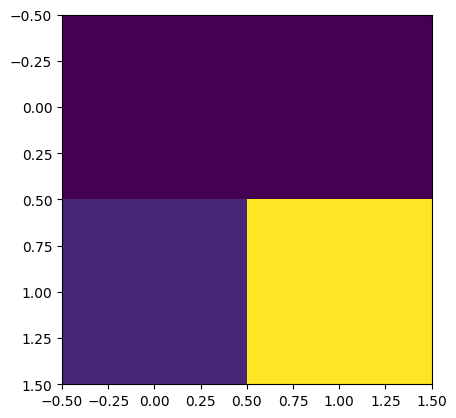

In [72]:
plt.imshow(cm_smote)

In [ ]:

plot_confusion_matrix(tmp_clf_1, tmp_test_y, smote_pred_y)  
plt.show()

In [44]:
dict_classifiers, dict_metrics = train_models('rfc', npa_x, npa_y, npa_test_x, npa_test_y, do_balance=True)

NameError: name 'train_models' is not defined

# TensorFlow based imbalanced dataset

References:
1. https://www.tensorflow.org/tutorials/structured_data/imbalanced_data